In [1]:
import json
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from pathlib import Path
from IPython.display import JSON
import seaborn as sns
from utils import (output_variables_table,
                   print_table,
                   mfp_mapping_dict,
                   USER_ID,
                   DATE,
                   ENTRIES,
                   SUMMARY,
                   COLUMNS,
                   COUNT,
                   LEN,
                   TOTAL,
                   GOAL,
                   MEAL,
                   DISHES,
                   SEQUENCE,
                   NUTRITIONS,
                   NAME,
                   VALUE,
                   NUM_LOGS,
                   INDEX,
                   CALORIES_GOAL,
                   CALORIES_TOTAL,
                   MEAL_COUNT)
from utils import MFP

In [2]:
print(1)

1


In [3]:
mfp = MFP()
mfp_df = mfp.get_df().to_pandas()
top_k = 100
top_k_df = mfp.filter_most_freq_users(top_k)
expanded_df = pd.concat(
    top_k_df.to_pandas().apply(lambda row: mfp.expand_entries(row[ENTRIES], row[USER_ID], row[DATE]), axis=1).tolist(),
    ignore_index=True
)
expanded_df
summary_expanded_df = top_k_df.to_pandas().apply(lambda row: mfp.expand_summary(row[SUMMARY], row[USER_ID]), axis=1)
user_id_col = summary_expanded_df.pop(USER_ID).astype(int)  # pandas converts USER_ID to float without specification
summary_expanded_df.insert(0, USER_ID, user_id_col)
df_with_summary_expanded = pd.concat([top_k_df.to_pandas(), summary_expanded_df], axis=1)
df_with_summary_expanded 

,user_id,date,entries,summary,user_id,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,...,Potass._goal,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,31,2014-09-14,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1688}...",31,NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
1,31,2014-09-15,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1995}...",31,NaN,NaN,2718.0,1995.0,NaN,...,3500.0,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN
2,31,2014-09-16,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1844}...",31,NaN,NaN,2756.0,1844.0,NaN,...,3500.0,1866.0,138.0,60.0,NaN,NaN,2300.0,1129.0,NaN,NaN
3,31,2014-09-17,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 2173}...",31,NaN,NaN,2340.0,2173.0,NaN,...,3500.0,801.0,117.0,68.0,NaN,NaN,2300.0,3324.0,NaN,NaN
4,31,2014-09-18,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1835}...",31,NaN,NaN,2755.0,1835.0,NaN,...,3500.0,670.0,138.0,106.0,NaN,NaN,2300.0,3090.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,9739,2015-04-05,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3273}...",9739,NaN,NaN,2985.0,3273.0,299.0,...,NaN,NaN,223.0,156.0,NaN,NaN,2300.0,2291.0,NaN,NaN
18058,9739,2015-04-06,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3013}...",9739,NaN,NaN,2848.0,3013.0,285.0,...,NaN,NaN,213.0,235.0,NaN,NaN,2300.0,1773.0,NaN,NaN
18059,9739,2015-04-07,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3215}...",9739,NaN,NaN,2972.0,3215.0,297.0,...,NaN,NaN,222.0,183.0,NaN,NaN,2300.0,1964.0,NaN,NaN
18060,9739,2015-04-08,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2154}...",9739,NaN,NaN,2792.0,2154.0,279.0,...,NaN,NaN,209.0,128.0,NaN,NaN,2300.0,1553.0,NaN,NaN


In [4]:
# This cell was previously used to ensure the sampling distribution matched the current distribution - always timed out for large DF
# def flatten_nutritional_data(df):
#     records = []
    
#     for _, row in df.iterrows():
#         user_id = row['user_id']  # Access user_id directly
#         entries = json.loads(row['entries'])  # Parse the JSON from the entries column
        
#         for entry in entries:  # Loop through each entry in the parsed JSON
#             meal = entry.get('meal')
#             dishes = entry.get('dishes', [])  # Default to empty list if 'dishes' is missing
            
#             for dish in dishes:
#                 for nutrition in dish.get('nutritions', []):  # Get 'nutritions' safely
#                     # Clean the nutrition value by removing commas and converting to int
#                     try:
#                         nutrition_value = int(nutrition.get('value', '0').replace(',', ''))  # Remove commas
#                     except ValueError:
#                         nutrition_value = 0  # Default to 0 if conversion fails
                    
#                     records.append({
#                         'user_id': user_id,
#                         'meal_name': meal,
#                         'dish_name': dish.get('name', 'Unknown'),  # Get dish name safely
#                         'nutrition_name': nutrition.get('name', 'Unknown'),  # Get nutrition name safely
#                         'nutrition_value': nutrition_value  # Store cleaned value
#                     })
    
#     return pd.DataFrame(records)

# # Flatten the sample DataFrame
# flattened_data = flatten_nutritional_data(sample_df)
# aggregated_data = flattened_data.groupby('user_id').agg(
#     total_calories=('nutrition_value', lambda x: x[flattened_data['nutrition_name'] == 'Calories'].sum()),
#     total_carbs=('nutrition_value', lambda x: x[flattened_data['nutrition_name'] == 'Carbs'].sum()),
#     entries_count=('nutrition_value', 'count')
# ).reset_index()

# # Define a range for minimum entries
# min_entries_range = range(20, 81, 20)  # From 20 to 80, step by 20

# # A list to store valid X values and their representative samples
# valid_x_samples = []

# # Loop through different minimum entries
# for min_entries in min_entries_range:
#     # Filter users based on minimum entries
#     filtered_users = aggregated_data[aggregated_data['entries_count'] >= min_entries]
    
#     # Check if we have any filtered users
#     if not filtered_users.empty:
#         # Check if the filtered sample is still representative
#         original_mean_calories = flattened_data['nutrition_value'][flattened_data['nutrition_name'] == 'Calories'].mean()
#         filtered_mean_calories = flattened_data[flattened_data['user_id'].isin(filtered_users['user_id'])]['nutrition_value'][flattened_data['nutrition_name'] == 'Calories'].mean()
        
#         # Check if means are close (10% relative tolerance)
#         is_representative = np.isclose(original_mean_calories, filtered_mean_calories, rtol=0.1)
        
#         valid_x_samples.append((min_entries, len(filtered_users), is_representative))

# # Print the results
# for x, sample_size, representative in valid_x_samples:
#     print(f"Threshold X = {x}: Sample Size = {sample_size}, Is Representative: {representative}")

# Create Meals dataframe where each meal unpacked, per day per meal

In [5]:
# Drop duplicate columns
df = df_with_summary_expanded.loc[:, ~df_with_summary_expanded.columns.duplicated()]
df.head()

,user_id,date,entries,summary,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,Carbs_total,...,Potass._goal,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,31,2014-09-14,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1688}...",NaN,NaN,1910.0,1688.0,NaN,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
1,31,2014-09-15,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1995}...",NaN,NaN,2718.0,1995.0,NaN,NaN,...,3500.0,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN
2,31,2014-09-16,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1844}...",NaN,NaN,2756.0,1844.0,NaN,NaN,...,3500.0,1866.0,138.0,60.0,NaN,NaN,2300.0,1129.0,NaN,NaN
3,31,2014-09-17,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 2173}...",NaN,NaN,2340.0,2173.0,NaN,NaN,...,3500.0,801.0,117.0,68.0,NaN,NaN,2300.0,3324.0,NaN,NaN
4,31,2014-09-18,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1835}...",NaN,NaN,2755.0,1835.0,NaN,NaN,...,3500.0,670.0,138.0,106.0,NaN,NaN,2300.0,3090.0,NaN,NaN


In [6]:
def safe_json_loads(value):
    if isinstance(value, str):
        return json.loads(value)
    return value  

In [7]:
# convert string to dict
df['entries'] = df['entries'].apply(json.loads)

expanded_rows = []
nutrient_columns = [col for col in df.columns if col.endswith('_goal') or col.endswith('_total')]

for _, row in df.iterrows():
    user_id = row['user_id']
    date = row['date']
    meal_id = 1  # reset for new user

    for meal in row['entries']:
        meal_name = meal['meal']  # Time of the meal
        
        dish_details = []
        
        for dish in meal.get('dishes', []):
            dish_name = dish.get('name', 'Unknown Dish')
            dish_nutritions = {nut['name']: nut['value'] for nut in dish.get('nutritions', [])}
            # keep dish deets
            dish_details.append({
                "dish_name": dish_name,
                **dish_nutritions 
            })
        
        dishes_json = json.dumps(dish_details)
        
        nutrient_data = {col: row[col] for col in nutrient_columns}

        expanded_rows.append({
            'user_id': user_id,
            'date': date,
            'meal_id': meal_id,
            'meal_time': meal_name,
            'dish_details': dishes_json,  # JSON string of all dish details
            **nutrient_data  # Unpack all nutrient goals and totals from the row
        })
        meal_id += 1

meal_df = pd.DataFrame(expanded_rows)

/var/folders/z7/y1b2vz_14td931c87v2z7wx80000gn/T/ipykernel_25042/2178023930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entries'] = df['entries'].apply(json.loads)


In [8]:
# desired format  - complex weird series like right now
meal_df['user_id'] = meal_df['user_id'].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) else x)
meal_df.head()

,user_id,date,meal_id,meal_time,dish_details,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,...,Potass._goal,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,31,2014-09-14,1,6AM to 9AM,"[{""dish_name"": ""Equate Ultra - Weightloss Shak...",NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
1,31,2014-09-14,2,9AM to 12PM,"[{""dish_name"": ""Mcdonald's - Big Mac, 211 g. (...",NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
2,31,2014-09-14,3,12PM to 3PM,"[{""dish_name"": ""Panamei Seafood - Frozen Tilap...",NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
3,31,2014-09-14,4,3PM to 6PM,"[{""dish_name"": ""Yellow Tail - Cabernet Sauvign...",NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
4,31,2014-09-15,1,6AM to 9AM,"[{""dish_name"": ""Great Value - 100% Pure Orange...",NaN,NaN,2718.0,1995.0,NaN,...,3500.0,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN


In [9]:
df.head()

,user_id,date,entries,summary,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,Carbs_total,...,Potass._goal,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,31,2014-09-14,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1688}...",NaN,NaN,1910.0,1688.0,NaN,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
1,31,2014-09-15,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1995}...",NaN,NaN,2718.0,1995.0,NaN,NaN,...,3500.0,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN
2,31,2014-09-16,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1844}...",NaN,NaN,2756.0,1844.0,NaN,NaN,...,3500.0,1866.0,138.0,60.0,NaN,NaN,2300.0,1129.0,NaN,NaN
3,31,2014-09-17,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 2173}...",NaN,NaN,2340.0,2173.0,NaN,NaN,...,3500.0,801.0,117.0,68.0,NaN,NaN,2300.0,3324.0,NaN,NaN
4,31,2014-09-18,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1835}...",NaN,NaN,2755.0,1835.0,NaN,NaN,...,3500.0,670.0,138.0,106.0,NaN,NaN,2300.0,3090.0,NaN,NaN


# Streak calculation of user log entries

In [10]:
def analyze_user_streaks(df):
    """
    Analyze non-overlapping streaks of consecutive daily entries for each user.
    
    Parameters: DF that has user_id and dates, anything else ignored. 
    
    Returns:
    DF: DataFrame containing all streaks with their start dates, end dates, and lengths
    """
    df['date'] = pd.to_datetime(df['date'])
    all_streaks = []
    
    # Process each user separately
    for user_id in df['user_id'].unique():
        # isolate a single user into a seperate DF, makes it easier and no need to deal with copies
        user_data = df[df['user_id'] == user_id].copy()
        user_data = user_data.sort_values('date')
        # Get all dates for this user
        dates = user_data['date'].dt.date.tolist()
        # some users are empty - avoid error
        if not dates:
            continue
            
        # streak_start/current_date always updated in loop to reflect latest 
        streak_start = dates[0]
        current_date = dates[0]
        
        for next_date in dates[1:]:
            expected_date = current_date + timedelta(days=1)
            
            # If the streak broke, record the streak and start a new one
            if next_date != expected_date:
                all_streaks.append({
                    'user_id': user_id,
                    'streak_start': streak_start,
                    'streak_end': current_date,
                    'streak_length': (current_date - streak_start).days + 1
                })
                # update streak_start only when we break current streak 
                streak_start = next_date
            
            current_date = next_date
        
        # last streak edge case
        all_streaks.append({
            'user_id': user_id,
            'streak_start': streak_start,
            'streak_end': current_date,
            'streak_length': (current_date - streak_start).days + 1
        })
    
    streaks_df = pd.DataFrame(all_streaks)
    
    streaks_df = streaks_df.sort_values(['user_id', 'streak_start'])
    
    return streaks_df

In [11]:
streaks_all_df = analyze_user_streaks(mfp_df)
streaks_all_df

,user_id,streak_start,streak_end,streak_length
0,1,2014-09-14,2014-10-04,21
1,1,2014-10-06,2014-11-01,27
2,1,2014-11-07,2015-03-12,126
3,2,2015-01-12,2015-03-12,60
4,3,2014-09-14,2014-09-19,6
...,...,...,...,...
81078,9896,2014-11-28,2014-11-28,1
81079,9896,2014-11-30,2014-12-02,3
81080,9897,2014-10-01,2014-10-25,25
81081,9897,2015-01-01,2015-03-04,63


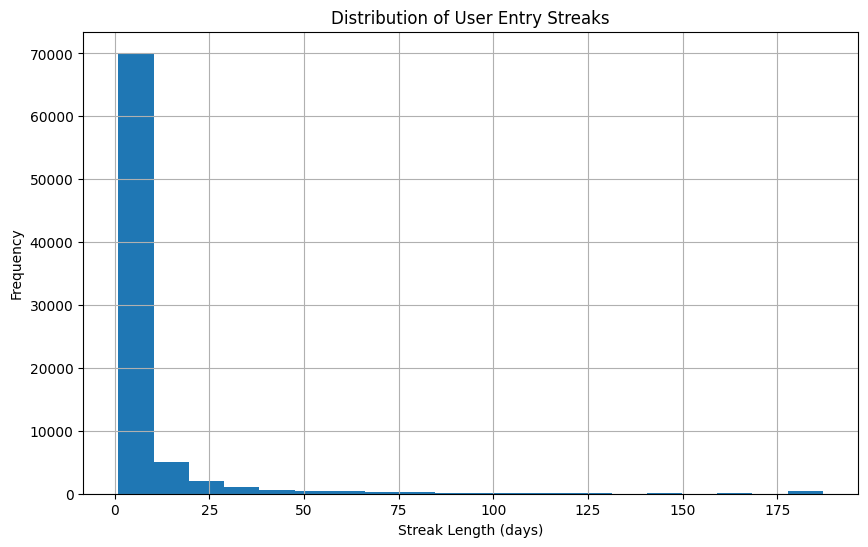

In [12]:
plt.figure(figsize=(10, 6))
streaks_all_df['streak_length'].hist(bins=20)
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.title('Distribution of User Entry Streaks')
plt.show()
# As expected, concentration around 1

In [13]:
streaks_all_df['streak_length'].describe()

count    81083.000000
mean         7.241802
std         18.140318
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        187.000000
Name: streak_length, dtype: float64

In [14]:
streaks_all_df['streak_length'].value_counts()

streak_length
1      31673
2      12138
3       7641
4       5629
5       4992
       ...  
129        1
171        1
149        1
185        1
181        1
Name: count, Length: 181, dtype: int64

# Allow for Cheat Days and weekly streaks

In [15]:
def analyze_streaks(df, freeze_days=0, weekly_mode=False, day_of_week=None, track_goals=False):
    """
    Analyze user streaks with at most one skip day/week per streak period
    
    Parameters:
    df: Dataframe with user_id and date columns
    freeze_days: Maximum number of allowed skip days/weeks (default 0)
    weekly_mode: If True, analyze weekly patterns instead of daily (default False)
    day_of_week: Day to track in weekly mode (0=Monday, 6=Sunday, default None)
    
    Returns:
    DataFrame: Contains streaks with start dates, end dates, lengths, and whether freeze day was used
    """
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    
    # Filter for specific day if in weekly mode
    if weekly_mode and day_of_week is not None:
        df['day_of_week'] = df['date'].dt.dayofweek
        df = df[df['day_of_week'] == day_of_week]
    
    if track_goals:
        df = df[df['total_calories_consumed'] <= df['calorie_goal']]
    
    all_streaks = []
    
    for user_id in df['user_id'].unique():
        user_data = df[df['user_id'] == user_id].sort_values('date')
        dates = user_data['date'].dt.date.tolist()
        
        if not dates:
            continue
            
        streak_start = dates[0]
        current_date = dates[0]
        freeze_used = False  # Track if freeze day has been used in current streak
        
        for next_date in dates[1:]:
            # Calculate gap based on mode
            if weekly_mode:
                gap = (next_date - current_date).days / 7
                expected_gap = 1
                max_gap = 1 + freeze_days if freeze_days > 0 else 1  # Becomes freeze weeks vs freeze days!
            else:
                gap = (next_date - current_date).days
                expected_gap = 1
                max_gap = 1 + freeze_days if freeze_days > 0 else 1  # Allow at most freeze_days day skip
            
            if gap > max_gap or (gap > expected_gap and freeze_used):
                # Gap too large or freeze already used, record streak and start new one
                all_streaks.append({
                    'user_id': user_id,
                    'streak_start': streak_start,
                    'streak_end': current_date,
                    'streak_length': get_streak_length(streak_start, current_date, weekly_mode),
                    'freeze_used': freeze_used
                })
                streak_start = next_date
                freeze_used = False
            else:
                # Within allowed gap, mark freeze as used if gap larger than expected
                if gap > expected_gap:
                    freeze_used = True
            
            current_date = next_date
        
        # Record final streak
        all_streaks.append({
            'user_id': user_id,
            'streak_start': streak_start,
            'streak_end': current_date,
            'streak_length': get_streak_length(streak_start, current_date, weekly_mode),
            'freeze_used': freeze_used
        })
    
    streaks_df = pd.DataFrame(all_streaks)
    return streaks_df.sort_values(['user_id', 'streak_start'])

def get_streak_length(start_date, end_date, weekly_mode):
    """Helper function to calculate streak length based on mode"""
    days = (end_date - start_date).days
    return (days // 7) + 1 if weekly_mode else days + 1

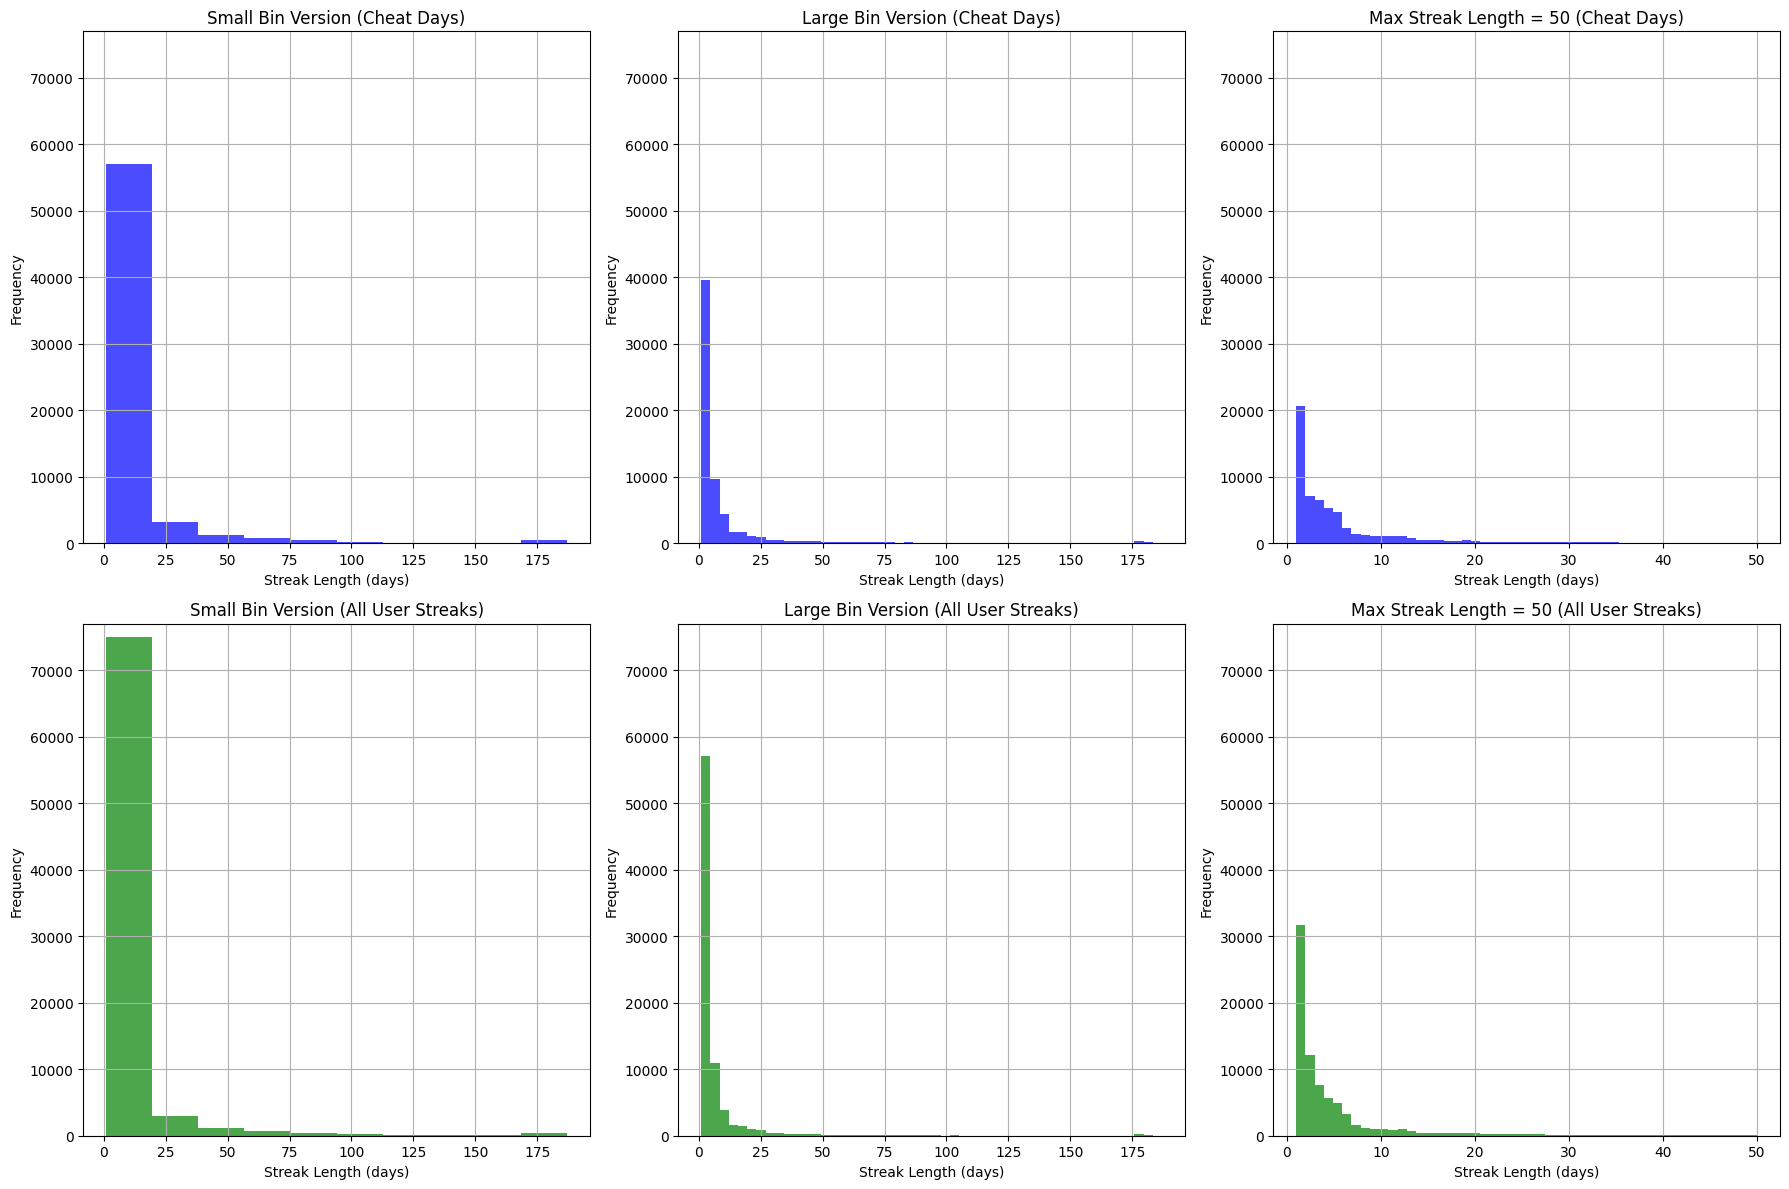

In [16]:
cheat_day_df = analyze_streaks(mfp_df, freeze_days=1)

# maximum frequency across all streak lengths
max_y = 77000

# 2 rows and 3 columns
plt.figure(figsize=(18, 12))

# Plot 1: Small bins (Cheat Day Entry Streaks)
plt.subplot(2, 3, 1)
cheat_day_df['streak_length'].hist(bins=10, color='blue', alpha=0.7)
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.title('Small Bin Version (Cheat Days)')
plt.ylim(0, max_y)

# Plot 2: Large bins (Cheat Day Entry Streaks)
plt.subplot(2, 3, 2)
cheat_day_df['streak_length'].hist(bins=50, color='blue', alpha=0.7)
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.title('Large Bin Version (Cheat Days)')
plt.ylim(0, max_y)

# Plot 3: Max streak length = 50 (Cheat Day Entry Streaks)
plt.subplot(2, 3, 3)
cheat_day_df[cheat_day_df['streak_length'] <= 50]['streak_length'].hist(bins=50, color='blue', alpha=0.7)
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.title('Max Streak Length = 50 (Cheat Days)')
plt.ylim(0, max_y)

# Plot 4: Small bins (All User Entry Streaks)
plt.subplot(2, 3, 4)
streaks_all_df['streak_length'].hist(bins=10, color='green', alpha=0.7)
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.title('Small Bin Version (All User Streaks)')
plt.ylim(0, max_y)

# Plot 5: Large bins (All User Entry Streaks)
plt.subplot(2, 3, 5)
streaks_all_df['streak_length'].hist(bins=50, color='green', alpha=0.7)
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.title('Large Bin Version (All User Streaks)')
plt.ylim(0, max_y)

plt.subplot(2, 3, 6)
streaks_all_df[streaks_all_df['streak_length'] <= 50]['streak_length'].hist(bins=50, color='green', alpha=0.7)
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.title('Max Streak Length = 50 (All User Streaks)')
plt.ylim(0, max_y)

plt.tight_layout()
plt.show()

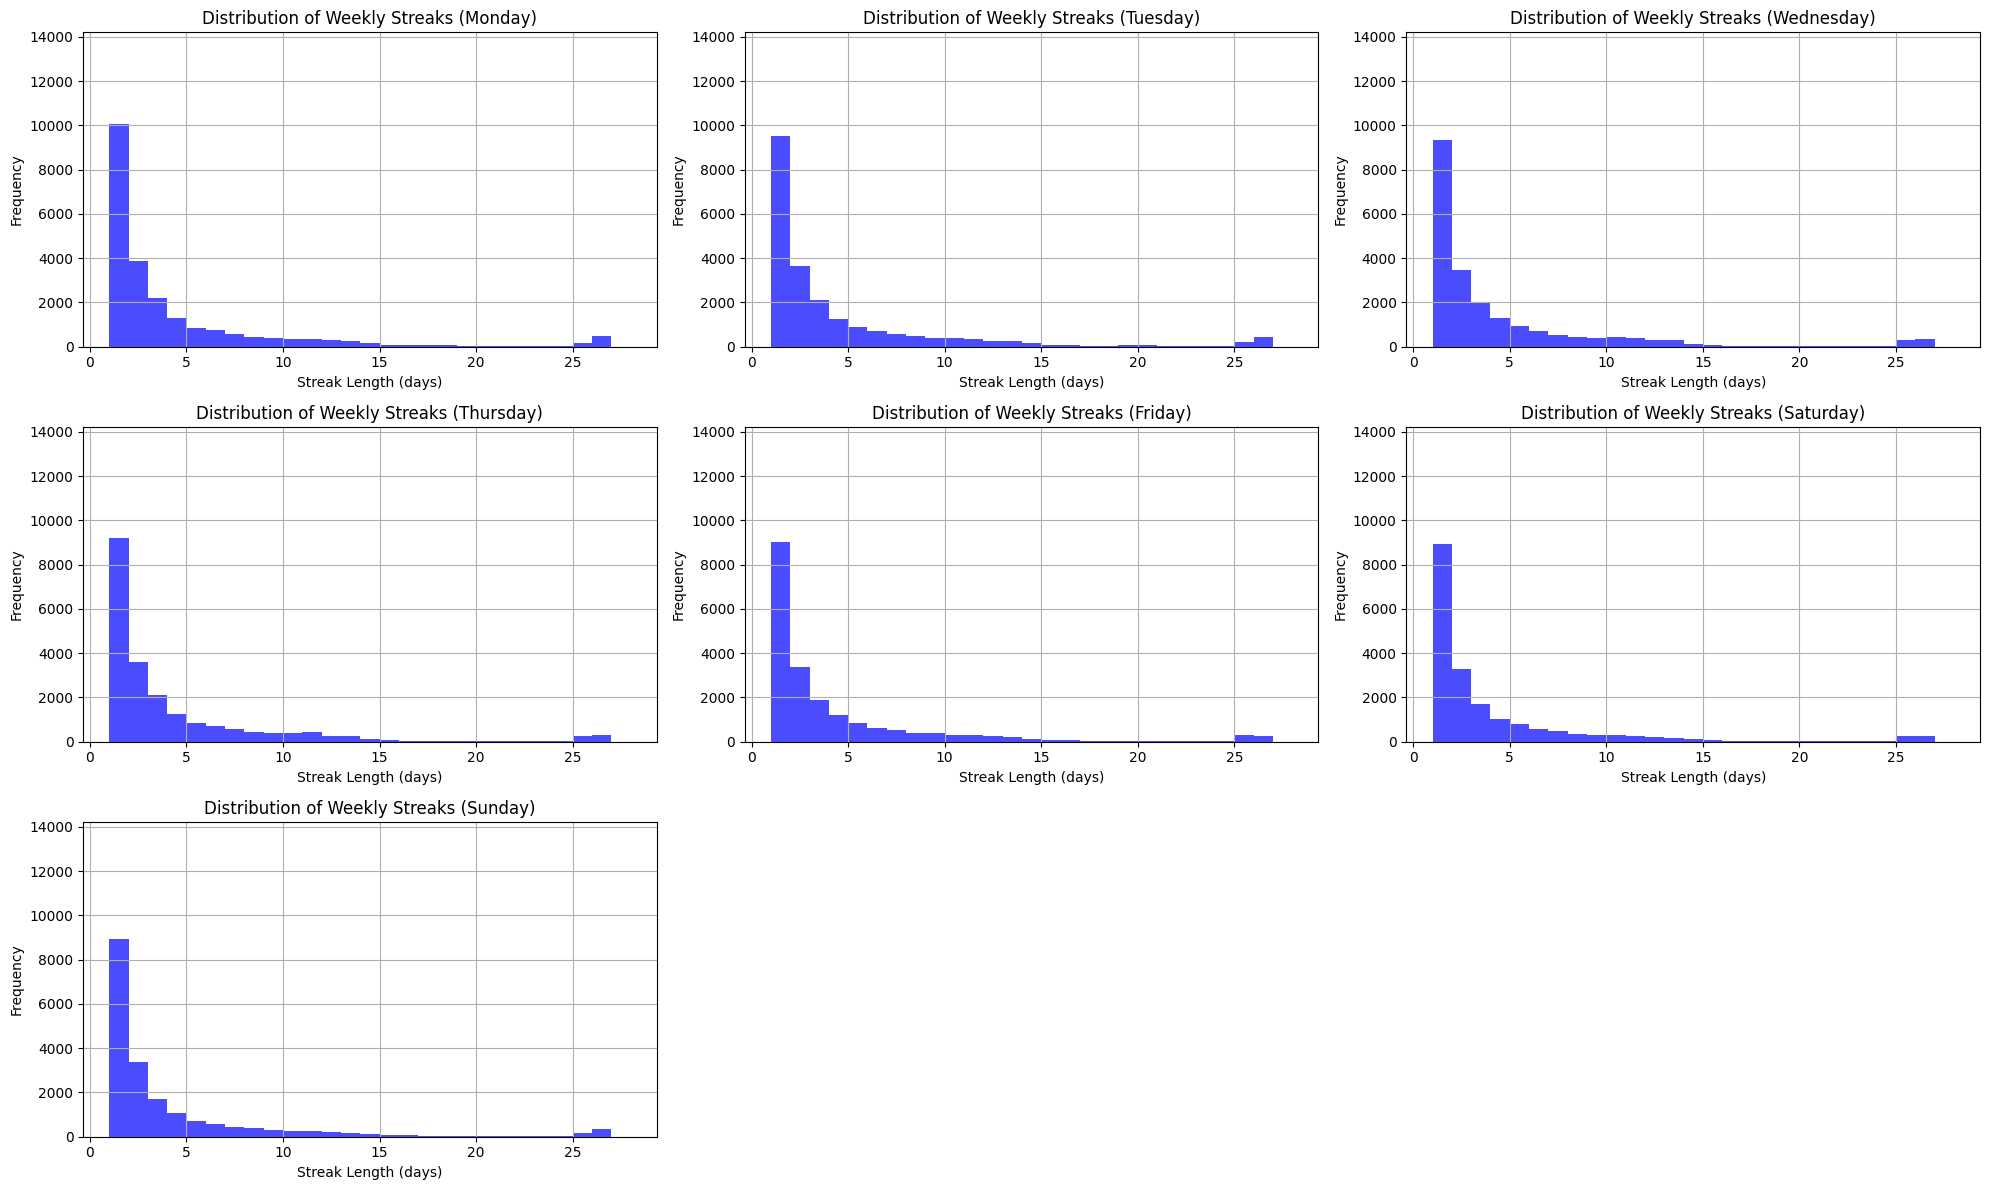

In [17]:
plt.figure(figsize=(20, 12)) 
# 0 is monday, 6 is Sunday
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in range(7):
    plt.subplot(3, 3, day + 1)  
    streak_lengths = analyze_streaks(mfp_df, freeze_days=0, weekly_mode=True, day_of_week=day)['streak_length']
    max_streak_length = streak_lengths.max()
    streak_lengths.hist(
        bins=range(1, max_streak_length + 2),  # range includes each streak length
        color='blue',
        alpha=0.7
    )
    
    plt.xlabel('Streak Length (days)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Weekly Streaks ({days_of_week[day]})')
    plt.ylim(0, 14200)

plt.tight_layout()
plt.show()



# Verifying streak calculations work as intended

In [18]:
sanity_check = analyze_streaks(mfp_df, freeze_days=0, weekly_mode=True, day_of_week=0)
sanity_check

,user_id,streak_start,streak_end,streak_length,freeze_used
0,1,2014-09-15,2014-10-27,7,False
1,1,2014-11-10,2015-03-09,18,False
2,2,2015-01-12,2015-03-09,9,False
3,3,2014-09-15,2014-09-15,1,False
4,4,2014-12-15,2014-12-22,2,False
...,...,...,...,...,...
23009,9895,2014-09-22,2014-10-06,3,False
23010,9895,2014-10-20,2015-03-09,21,False
23011,9896,2014-11-10,2014-12-01,4,False
23012,9897,2014-10-06,2014-10-20,3,False


In [19]:
def calculate_weeks(start, end):
    days_difference = (end - start).days
    return days_difference // 7 
calculate_weeks(sanity_check['streak_start'][1], sanity_check['streak_end'][1])
# expect calculate_weeks + 1 to be streak as a single week would be a single streak technically, so off by 1

17

In [20]:
mfp_df.iloc[0]['summary']

'{"total": [{"name": "Calories", "value": 2924}, {"name": "Carbs", "value": 340}, {"name": "Fat", "value": 114}, {"name": "Protein", "value": 186}, {"name": "Sodium", "value": 3658}, {"name": "Sugar", "value": 109}], "goal": [{"name": "Calories", "value": 3173}, {"name": "Carbs", "value": 396}, {"name": "Fat", "value": 105}, {"name": "Protein", "value": 160}, {"name": "Sodium", "value": 2300}, {"name": "Sugar", "value": 119}]}'

In [21]:

def extract_calories_summary(df):
    def parse_summary(row):
        try:
            summary = json.loads(row)
            total_calories = next(
                (item["value"] for item in summary.get("total", []) if item["name"] == "Calories"), None
            )
            calorie_goal = next(
                (item["value"] for item in summary.get("goal", []) if item["name"] == "Calories"), None
            )
            return total_calories, calorie_goal
        except (KeyError, TypeError, ValueError) as e:
            return None, None
    # Apply parsing function to the 'summary' column
    df[["total_calories_consumed", "calorie_goal"]] = df["summary"].apply(
        lambda x: pd.Series(parse_summary(x))
    )
    return df[["user_id", "date", "total_calories_consumed", "calorie_goal"]]
extract_calories_summary(mfp_df)

,user_id,date,total_calories_consumed,calorie_goal
0,1,2014-09-14,2924.0,3173.0
1,1,2014-09-15,2430.0,1572.0
2,1,2014-09-16,1862.0,1832.0
3,1,2014-09-17,2251.0,1685.0
4,1,2014-09-18,2001.0,1597.0
...,...,...,...,...
587182,9897,2015-03-02,1979.0,2017.0
587183,9897,2015-03-03,2141.0,1799.0
587184,9897,2015-03-04,543.0,1920.0
587185,9897,2015-03-14,2024.0,2118.0


# Plotting by max streaks for each user

Text(0.5, 1.0, 'Max Streak Length per user')

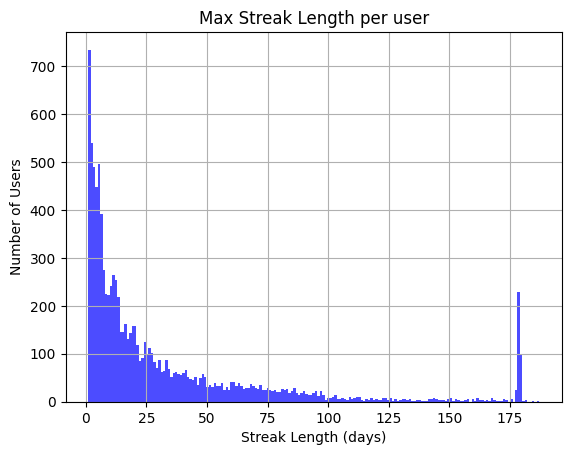

In [22]:
max_streaks_per_user = streaks_all_df.groupby('user_id')['streak_length'].max()
max_streaks_per_user.hist(bins=streaks_all_df['streak_length'].max(), color='blue', alpha=0.7)
plt.xlabel('Streak Length (days)')
plt.ylabel('Number of Users')
plt.title('Max Streak Length per user')

Text(0.5, 1.0, 'User streaks where calorie goals where met')

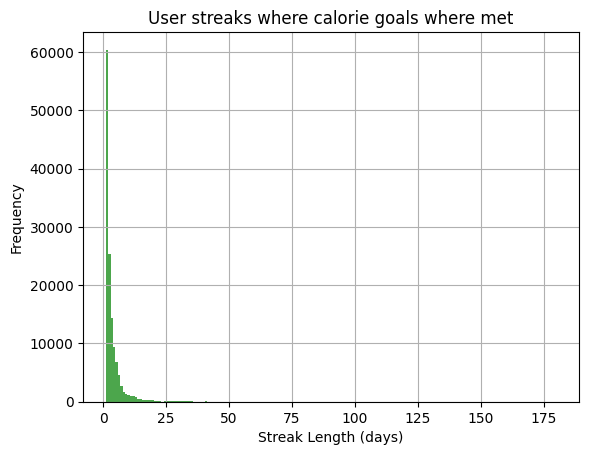

In [23]:
calorie_goal_df = analyze_streaks(mfp_df, freeze_days=0, weekly_mode=False, day_of_week=None, track_goals=True)
calorie_goal_df['streak_length'].hist(bins=streaks_all_df['streak_length'].max(), color='green', alpha=0.7)
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.title('User streaks where calorie goals where met')

# Begin markov chain code

# P(At|At-1)

In [25]:
def transition_probabilities(df):
    # clean up df
    markov_df = df.copy()
    markov_df['date'] = pd.to_datetime(markov_df['date'])
    markov_df = markov_df.drop(['entries', 'summary'], axis=1)
    user_transitions = []

    # Process each user individually
    for user_id, user_data in df.groupby('user_id'):
        # Create a complete date range for this user
        date_range = pd.date_range(
            start=user_data['date'].min(),
            end=user_data['date'].max(),
            freq='D'
        )
        
        # Create binary logging indicator
        daily_logs = pd.DataFrame(index=date_range)
        daily_logs['logged'] = daily_logs.index.isin(user_data['date']).astype(int)
        
        # shift DOWN by 1 and account for prev day, (NAN)
        daily_logs['prev_logged'] = daily_logs['logged'].shift(1)
        daily_logs.loc[daily_logs.index[0], 'prev_logged'] = 1
        # Calculate transition probabilities for this user
        user_transition = {
            'user_id': user_id,
            'P(At=1|At-1=1)': daily_logs[daily_logs['prev_logged'] == 1]['logged'].mean(),
            'P(At=0|At-1=1)': 1 - daily_logs[daily_logs['prev_logged'] == 1]['logged'].mean(),
            'P(At=1|At-1=0)': daily_logs[daily_logs['prev_logged'] == 0]['logged'].mean(),
            'P(At=0|At-1=0)': 1 - daily_logs[daily_logs['prev_logged'] == 0]['logged'].mean(),
        }
        
        # Append user-specific results
        user_transitions.append(user_transition)
    transitions_df_1 = pd.DataFrame(user_transitions)
    all_transitions_1 = transitions_df_1.mean(numeric_only=True, axis=0).to_dict()
    del all_transitions_1['user_id']
    return (transitions_df_1, all_transitions_1)
transitions_df, all_transitions = transition_probabilities(mfp_df)

In [26]:
# sanity checks confirmed
streaks_all_df[streaks_all_df['user_id'] == 2]
len(set(mfp_df[mfp_df['user_id'] == 2]['date']))
streaks_all_df[streaks_all_df['user_id'] == 5]

,user_id,streak_start,streak_end,streak_length
14,5,2014-09-14,2015-03-11,179


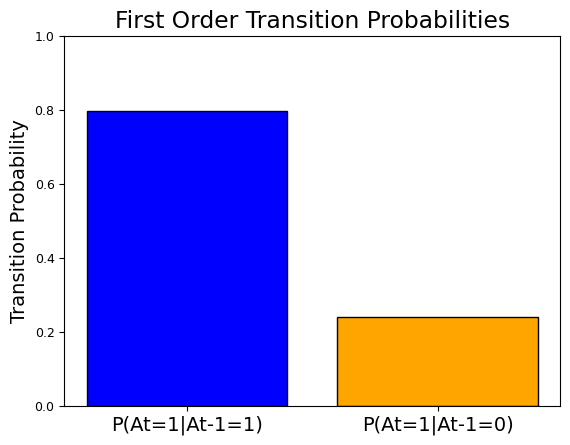

In [33]:
P_A1_given_A1 = all_transitions['P(At=1|At-1=1)']
P_A1_given_A0 = all_transitions['P(At=1|At-1=0)']

plt.bar(
    ['P(At=1|At-1=1)', 'P(At=1|At-1=0)'], 
    [P_A1_given_A1, P_A1_given_A0], 
    color=['blue', 'orange'], 
    edgecolor='black', capsize=5
)
plt.ylabel('Transition Probability')
plt.title('First Order Transition Probabilities')
plt.rcParams.update({'font.size': 14})
plt.yticks(fontsize=9)
plt.ylim(0, 1)  # Transition probabilities range between 0 and 1
plt.show()

In [28]:
all_transitions

{'P(At=1|At-1=1)': 0.7971217412714464,
 'P(At=0|At-1=1)': 0.20287825872855358,
 'P(At=1|At-1=0)': 0.2407813059095395,
 'P(At=0|At-1=0)': 0.7592186940904605}

# P(At|At-1, At-2)

In [29]:
def transition_probabilities_2(df):
    # Clean up the dataframe
    markov_df = df.copy()
    markov_df['date'] = pd.to_datetime(markov_df['date'])
    markov_df = markov_df.drop(['entries', 'summary'], axis=1)
    user_transitions = []

    # Process each user individually
    for user_id, user_data in df.groupby('user_id'):
        # Create a complete date range for this user
        date_range = pd.date_range(
            start=user_data['date'].min(),
            end=user_data['date'].max(),
            freq='D'
        )
        
        # Create binary logging indicator
        daily_logs = pd.DataFrame(index=date_range)
        daily_logs['logged'] = daily_logs.index.isin(user_data['date']).astype(int)
        
        # Shift down by 1 and 2 to get two prev days
        daily_logs['prev_logged_1'] = daily_logs['logged'].shift(1)
        daily_logs['prev_logged_2'] = daily_logs['logged'].shift(2)
        
        # edge case - users with less than 2 days
        if len(daily_logs.index) > 0:
            daily_logs.loc[daily_logs.index[0], 'prev_logged_1'] = 1
        if len(daily_logs.index) > 1:
            daily_logs.loc[daily_logs.index[1], 'prev_logged_2'] = 1
        
        user_transition = {
            'user_id': user_id,
            'P(At=1|At-1=1, At-2=1)': daily_logs[
                (daily_logs['prev_logged_1'] == 1) & (daily_logs['prev_logged_2'] == 1)
            ]['logged'].mean(),
            'P(At=0|At-1=1, At-2=1)': 1 - daily_logs[
                (daily_logs['prev_logged_1'] == 1) & (daily_logs['prev_logged_2'] == 1)
            ]['logged'].mean(),
            'P(At=1|At-1=0, At-2=1)': daily_logs[
                (daily_logs['prev_logged_1'] == 0) & (daily_logs['prev_logged_2'] == 1)
            ]['logged'].mean(),
            'P(At=0|At-1=0, At-2=1)': 1 - daily_logs[
                (daily_logs['prev_logged_1'] == 0) & (daily_logs['prev_logged_2'] == 1)
            ]['logged'].mean(),
            'P(At=1|At-1=1, At-2=0)': daily_logs[
                (daily_logs['prev_logged_1'] == 1) & (daily_logs['prev_logged_2'] == 0)
            ]['logged'].mean(),
            'P(At=0|At-1=1, At-2=0)': 1 - daily_logs[
                (daily_logs['prev_logged_1'] == 1) & (daily_logs['prev_logged_2'] == 0)
            ]['logged'].mean(),
            'P(At=1|At-1=0, At-2=0)': daily_logs[
                (daily_logs['prev_logged_1'] == 0) & (daily_logs['prev_logged_2'] == 0)
            ]['logged'].mean(),
            'P(At=0|At-1=0, At-2=0)': 1 - daily_logs[
                (daily_logs['prev_logged_1'] == 0) & (daily_logs['prev_logged_2'] == 0)
            ]['logged'].mean(),
        }
        
        user_transitions.append(user_transition)
    
    transitions_df = pd.DataFrame(user_transitions)
    
    # Calculate overall transition probabilities (mean across all users)
    all_transitions = transitions_df.mean(numeric_only=True, axis=0).to_dict()
    del all_transitions['user_id']
    
    return (transitions_df, all_transitions)

transitions_df_2, all_transitions_2 = transition_probabilities_2(mfp_df)


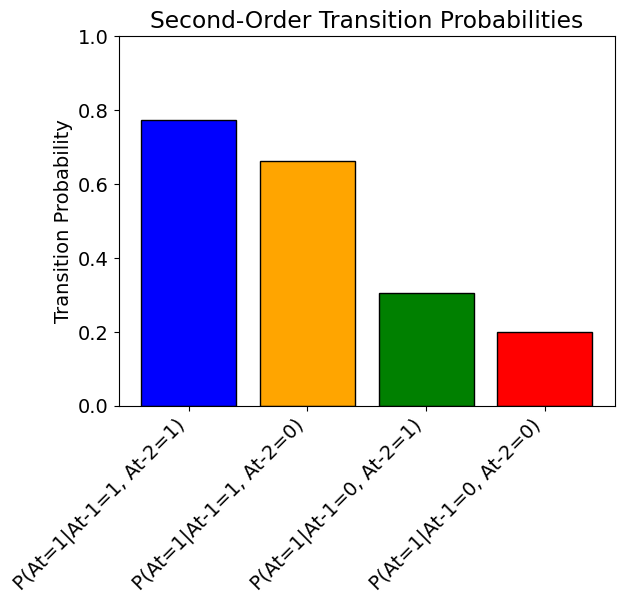

In [31]:
# Calculate mean probabilities
P_A1_given_A11 = all_transitions_2['P(At=1|At-1=1, At-2=1)']
P_A1_given_A10 = all_transitions_2['P(At=1|At-1=1, At-2=0)']
P_A1_given_A01 = all_transitions_2['P(At=1|At-1=0, At-2=1)']
P_A1_given_A00 = all_transitions_2['P(At=1|At-1=0, At-2=0)']

plt.bar(
    ['P(At=1|At-1=1, At-2=1)', 'P(At=1|At-1=1, At-2=0)', 
     'P(At=1|At-1=0, At-2=1)', 'P(At=1|At-1=0, At-2=0)'], 
    [P_A1_given_A11, P_A1_given_A10, P_A1_given_A01, P_A1_given_A00], 
    color=['blue', 'orange', 'green', 'red'], 
    edgecolor='black', capsize=5
)
plt.ylabel('Transition Probability')
plt.title('Second-Order Transition Probabilities')
plt.ylim(0, 1)  
plt.xticks(rotation=45, ha='right') 
plt.show()


# P(At| streak length)

In [38]:
def enumerate_streaks(streaks_all_df):
    """
    Enumerates all possible sub-streaks from the longest streak for each user.
    """
    all_streak_data = []
    
    for _, streak in streaks_all_df.iterrows():
        user_id = streak['user_id']
        streak_start = streak['streak_start']
        streak_end = streak['streak_end']
        streak_length = streak['streak_length']

        # Generate all possible sub-streaks from 1 to streak_length
        for length in range(1, streak_length + 1):
            all_streak_data.append({
                'user_id': user_id,
                'streak_length_prev': length,
                'streak_end': streak_end
            })
    
    return all_streak_data

enumerated_streaks = enumerate_streaks(streaks_all_df)
enumerate_streaks

# P(Next streak length | curr streak length, break length )

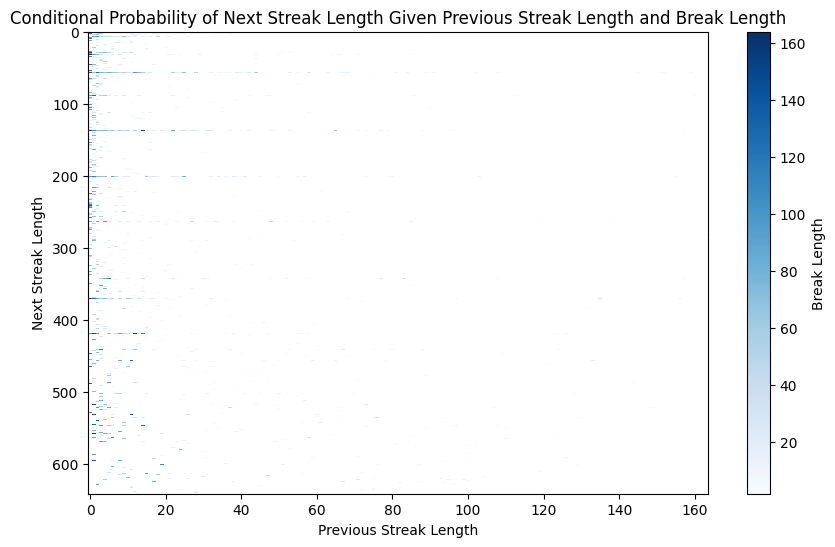

In [59]:
# Prepare Streak Transition Data
def prepare_streak_transition_data_max_len(streaks_all_df):
    streak_transitions = []
    streaks_all_df = streaks_all_df.sort_values(by=['user_id', 'streak_start'])
    
    for user_id, group in streaks_all_df.groupby('user_id'):
        prev_streak_length = None
        
        for i in range(len(group) - 1):
            current_streak = group.iloc[i]
            next_streak = group.iloc[i + 1]
            break_length = (next_streak['streak_start'] - current_streak['streak_end']).days
            
            # Append the streak transition data (prev, curr, break)
            streak_transitions.append({
                'user_id': user_id,
                'prev_streak_length': current_streak['streak_length'],
                'break_length': break_length,
                'next_streak_length': next_streak['streak_length']
            })
    
    return pd.DataFrame(streak_transitions)

# Calculate Conditional Probability
def calculate_streak_length_probabilities(streak_transition_df):
    # Group by the previous streak length and break length, and then calculate the mean of the next streak length
    streak_probabilities = streak_transition_df.groupby(['prev_streak_length', 'break_length'])['next_streak_length'].mean().reset_index()
    
    # Nan eliminate
    streak_probabilities = streak_probabilities.dropna(subset=['next_streak_length'])

    return streak_probabilities

# Plot the Results - think abt how to improve visibility.... kinda sparse and light rn 
# heatmap?? scale??
def plot_streak_length_probabilities(streak_probabilities):
    pivot_df = streak_probabilities.pivot_table(index='next_streak_length', columns='prev_streak_length', values='break_length')
    
    plt.figure(figsize=(10, 6))
    plt.imshow(pivot_df, cmap='Blues', interpolation='nearest', aspect='auto')
    plt.colorbar(label='Break Length')
    plt.xlabel('Previous Streak Length')
    plt.ylabel('Next Streak Length')
    plt.title('Conditional Probability of Next Streak Length Given Previous Streak Length and Break Length')
    plt.show()

streak_transition_df = prepare_streak_transition_data_max_len(streaks_all_df)
streak_probabilities = calculate_streak_length_probabilities(streak_transition_df)
plot_streak_length_probabilities(streak_probabilities)


In [51]:
mfp_sample = mfp_df.sample(frac=0.15)
streaks_sample = analyze_user_streaks(mfp_sample)
streaks_sample_enumerate = enumerate_streaks(streaks_sample)

In [55]:
streak_length_conditional_p_df_sample = calculate_logging_probabilities(mfp_sample, streaks_sample_enumerate, streaks_sample)
streak_length_conditional_p_df_sample

,streak_length_prev,P(At|streak length)
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
